**PS3: Value Iteration**

Planning Algorithms in AI

Kashirin Aleksandr

Skoltech 2021

**Task 1: Value Iteration G∗**

In this task, you will calculate the optimal cost-to-go by using the Value Iteration algorithm explained in class

In [1]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from utils import plot_enviroment, action_space, transition_function
from vi import vi, policy_vi
import matplotlib.animation as animation
#%matplotlib widget

# Control flags
labelsize = 14
titlesize = 16
suptitlesize = 18

Visualization of the Environment

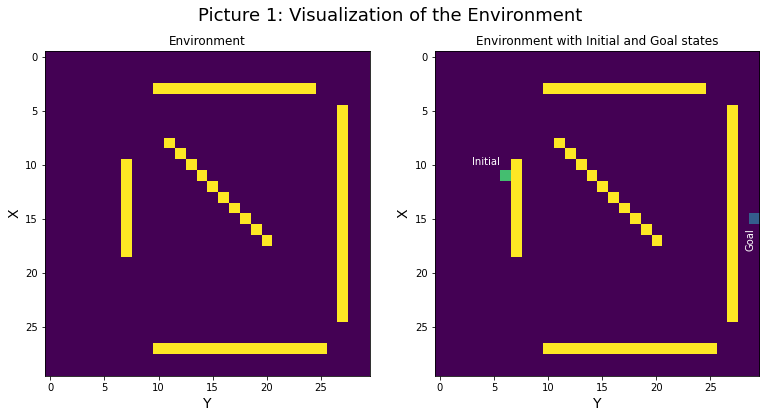

In [2]:
# Load the data
data = np.load("data_ps3.npz")
environment = data['environment']

# Plot the environment
plt.figure(figsize=[6.4*2, 6])
plt.suptitle('Picture 1: Visualization of the Environment', fontsize=suptitlesize)

# Plot the environment
plt.subplot(1, 2, 1)
plt.imshow(environment)
plt.title('Environment')
plt.xlabel('Y', fontsize=labelsize)
plt.ylabel('X', fontsize=labelsize)

# Define goal state and initial state
X_init = (11, 6)
X_goal = (15, 29)

# Plot the Environment with goal and initial states
plt.subplot(1, 2, 2)
im = plot_enviroment(environment, X_init, X_goal)
plt.imshow(im)
plt.title('Environment with Initial and Goal states')
plt.text(X_init[1] - 3, X_init[0] - 1, "Initial", c='white')
plt.text(X_goal[1], X_goal[0] + 3, "Goal", c='white', rotation='vertical', rotation_mode='anchor')
plt.xlabel('Y', fontsize=labelsize)
plt.ylabel('X', fontsize=labelsize)

plt.show()

**A. Enumerate the action space. The coordinates of actions are $u= (row,column)$.**

In [3]:
action_names = ['Up', 'Left', 'Down', 'Right']
for i in range(len(action_space)):
    print(action_names[i], ":", action_space[i])

# Define dictionary with action names and spaces
actions = dict(zip(action_space, action_names))

Up : (-1, 0)
Left : (0, -1)
Down : (1, 0)
Right : (0, 1)


**B. Formulate the optimal cost-to-go G∗ in recursive form**

$G_k^* = min_{u_k}(l(x_k, u_k) + G_{k+1}^*(f(x_k, u_k)))$




**C. Implement the VI algorithm for infinite length sequences. To show this, you are asked to include a picture of the final G∗**

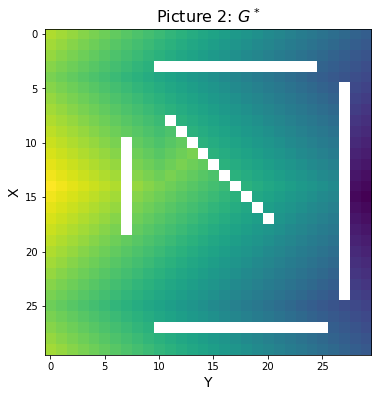

In [4]:
def implement_value_iteration(env, goal, N=100, action_space=action_space):
    """ Function returns a 2D matrix with cost-to-go to the desired goal position
    
    Args:
        env - The grid environment
        goal - The goal state
        N - Limit of iterations for the while cycle
        action_space - Space of possible actions for the entity
        
    Returns:
        G - 2D matrix with cost-to-go to the desired goal position
    """
    # Initialize action cost
    action_cost = 1
    # Initialize G graph
    G = np.zeros(env.shape)
    G[:] = np.inf
    G[goal] = 0
    # Initialize counter
    counter = 0
    # Initialize flag of G change
    flag = True
    # While there is a change in G graph
    while flag == True:
        # If the G graph was not changed
        if flag == False:
            # Then break the cycle
            break
        # Increment the counter
        counter += 1
        # If counter reached it is limit
        if counter == N:
            # Then break the cycle
            break
        # Set flag to False
        flag = False
        # Calculate G
        # For each X, Y
        for x in range(env.shape[0]):
            for y in range(env.shape[1]):
                # Check if G[X,Y] != inf
                if G[x, y] != np.inf:
                    # Assign the state
                    state = (x, y)
                    # For each action
                    for action in action_space:
                        # Calculate new state
                        new_state, is_action = transition_function(env, state, action)
                        # If action is possible
                        if is_action:
                            # Than compare current cost in the cell of new_state 
                            # with the cost of previous state + action cost
                            G[new_state] = min(G[new_state], G[state] + action_cost)
                            # Set flag True, as we modified G matrix
                            flag = True
    return G

G_star = implement_value_iteration(environment, X_goal)

# Plot the Heatmap of the matrix
plt.figure(figsize=[6.4, 6])
plt.imshow(G_star)
plt.title(r'Picture 2: $G^*$', fontsize=titlesize)
plt.xlabel('Y', fontsize=labelsize)
plt.ylabel('X', fontsize=labelsize)
plt.show()

**D. Experiment with different number of iterations. Start with a 1 iteration VI, describe the results obtained and reason why.**

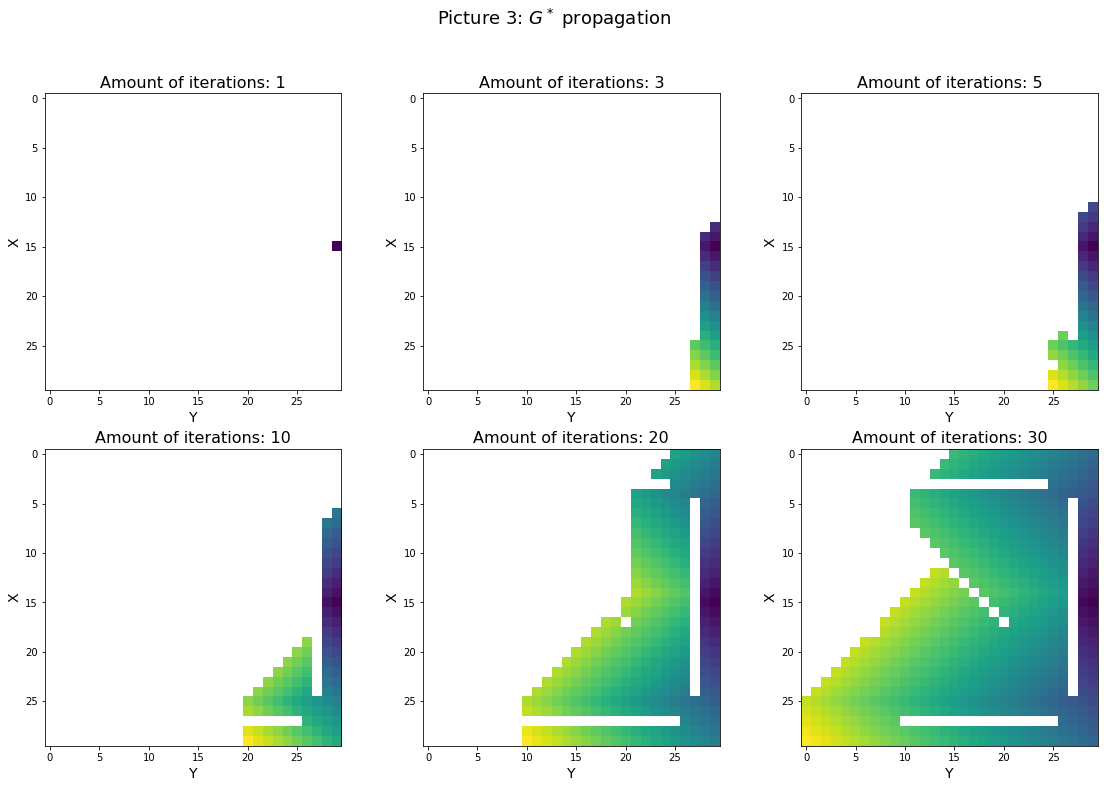

In [5]:
steps = [1, 3, 5, 10, 20, 30]
G_iter = []
for step in steps:
    G_iter.append(implement_value_iteration(environment, X_goal, N=step))

# Plot the Heatmap of the matrix
plt.figure(figsize=[6.4*3, 6*2])
plt.suptitle(r'Picture 3: $G^*$ propagation', fontsize=suptitlesize)

for i in range(len(steps)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(G_iter[i])
    plt.title(f'Amount of iterations: {steps[i]}', fontsize=titlesize)
    plt.xlabel('Y', fontsize=labelsize)
    plt.ylabel('X', fontsize=labelsize)

plt.show()

**Task 2: Calculate a plan with VI**

**Formulate how to obtain the optimal policy $u^*$ from $G^*$**

The optimal cost-to-go, in addition, can be used to recover the optimal plan in the following way:

$u^* = arg_{u \in U(x)} min(l(x, u) + G^*(f(x, u)))$

Simply, it just tell us that from any random point in the specified environment, we have to pick the point(state) with the number that has the lowest value and move towards these numbers in order to get an optimal path.

**B: Implement an algorithm to obtain the optimal policy $u^*$ from $G^*$. This policy can be a table. To test this, start at an initial position and execute the result of your policy and the transition function until you reach the goal.**

In [6]:
def implement_policy_VI(G, env=environment, actions=actions, action_space=action_space):
    """ Function calculate a policy for cost-to-go 2d-matrix

    Args:
        G - 2D matrix with cost-to-go to the desired goal position
        env - Environment workspace
        actions - Dictionary with possible actions and coordinates {coordinates:name}

    Returns:
        policy - 2D matrix with names of actions to perform towards goal state
    """
    # Initialize policy matrix
    policy = np.chararray(G.shape, itemsize=5)
    # For each cell in cost-to-go matrix
    for x in range(G.shape[0]):
        for y in range(G.shape[1]):
            # Assign the current state
            state = (x, y)
            # For each action
            for action in action_space:
                # Calculate new state
                new_state, is_action = transition_function(env, state, action)
                # If action is possible
                if is_action:
                    # Than check if the value in the state is more
                    # then in the new_state
                    if G[state] > G[new_state]:
                        # Calculate differences betwee states
                        diff = tuple(np.array(new_state) - np.array(state))
                        # Pick the name of the movement from actions dictionary
                        # and assign the name of this movement to cell of policy table
                        policy[state] = actions[diff]
                        # if we already changed the cell, than omit other actions
                        break
    return policy

P = implement_policy_VI(G_star)

In [7]:
# Define functions to calculate plan
def get_plan(X_init, X_goal, policy, actions=actions):
    """ Function returns plan according to the obtained policy

    Args:
        X_init - Initial state
        X_goal - Goal state
        policy - Obtained policy
        actions - Dictionary with possible actions and coordinates {coordinates:name}

    Returns:
        plan - Path plan
    """
    # Invert actions dictionary
    inverted_actions = {name:coordinates for coordinates, name in actions.items()}
    # Initialize plan
    plan = []
    # Initialize first state
    state = X_init
    # While we have not reached th goal state
    while state != X_goal:
        # If we are reached the goal state
        if state == X_goal:
            # And break the cycle
            break
        # Append node in the plan
        plan.append(state)
        # Get the direction in the policy of the current state
        direction = policy[state].decode('ascii')
        # Get the coordinates according to the inverted dictionary
        coordinates = inverted_actions[direction]
        # Get the new state
        state = tuple(np.array(state) + np.array(coordinates))
    # Append the last state
    plan.append(X_goal)
    return plan

plan = get_plan(X_init, X_goal, P)

MovieWriter ffmpeg unavailable; using Pillow instead.


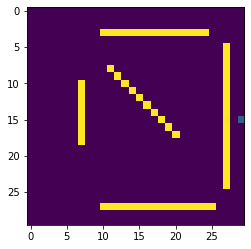

In [8]:
# Visualization of the algorithm
fig = plt.figure()
imgs = []
for X in plan:
    im = plot_enviroment(environment, X, X_goal)
    plot = plt.imshow(im)
    imgs.append([plot])

ani = animation.ArtistAnimation(fig, imgs, interval=100, blit=True)
ani.save('plan_vi.gif')
plt.show()

**C. Experiment with different parameters, such as starting points, the order of the states you use in VI (for loops) and the order of the actions. Explain your observations.**

**a) Change the starting point**

MovieWriter ffmpeg unavailable; using Pillow instead.


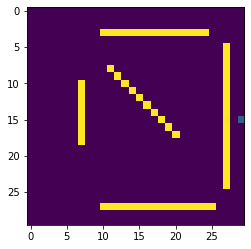

In [9]:
# Different starting point
X_start = (1, 1)
plan_C_a = get_plan(X_start, X_goal, P)

# Visualization of the algorithm
fig = plt.figure()
imgs = []
for X in plan_C_a:
    im = plot_enviroment(environment, X, X_goal)
    plot = plt.imshow(im)
    imgs.append([plot])

ani = animation.ArtistAnimation(fig, imgs, interval=100, blit=True)
ani.save('plan_C_a.gif')
plt.show()

**Comment: With another starting point (1,1) algorithm works well.**

**b) Change of state iteration**

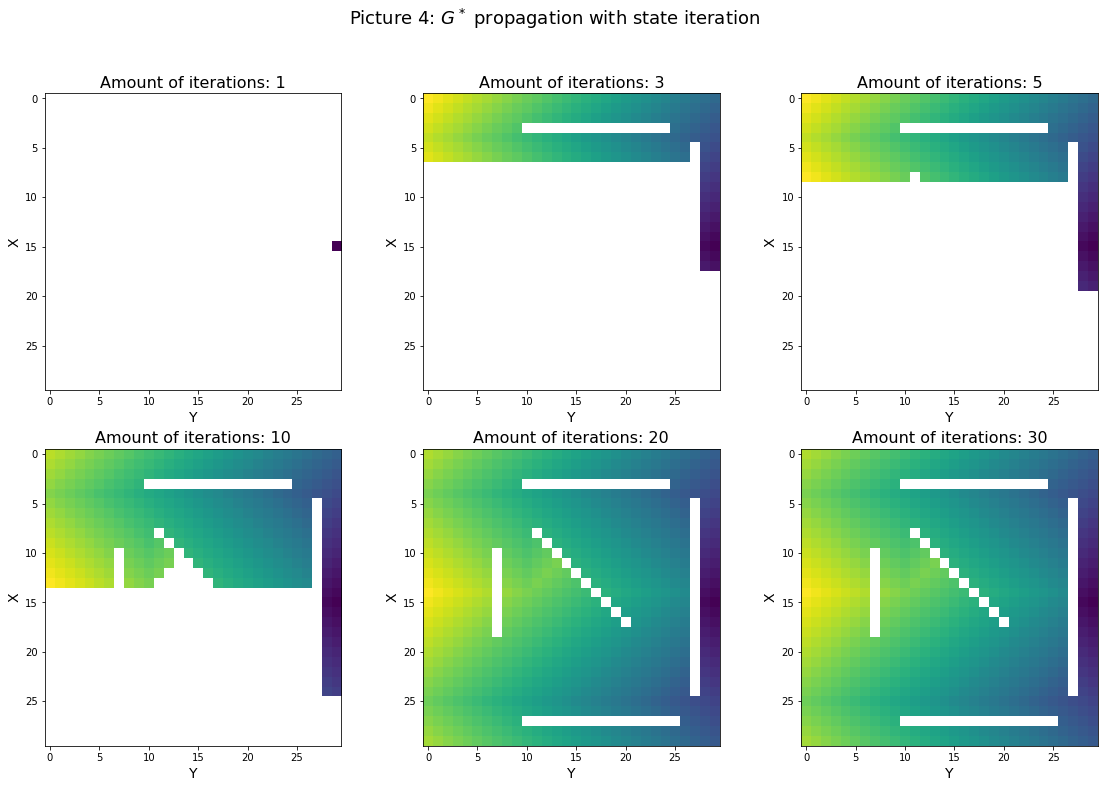

In [10]:
# Changing order of states for the value iteration algorithm

def implement_changed_value_iteration(env, goal, N=100):
    """ Function returns a 2D matrix with cost-to-go to the desired goal position
    
    Args:
        env - The grid environment
        goal - The goal state
        N - Limit of iterations for the while cycle

    Returns:
        G - 2D matrix with cost-to-go to the desired goal position
    """
    # Initialize action cost
    action_cost = 1
    # Initialize G graph
    G = np.zeros(env.shape)
    G[:] = np.inf
    G[goal] = 0
    # Initialize counter
    counter = 0
    # Initialize flag of G change
    flag = True
    # While there is a change in G graph
    while flag == True:
        # If the G graph was not changed
        if flag == False:
            # Then break the cycle
            break
        # Increment the counter
        counter += 1
        # If counter reached it is limit
        if counter == N:
            # Then break the cycle
            break
        # Set flag to False
        flag = False
        # Calculate G
        # For each X, Y
        for x in range(env.shape[0]-1, -1, -1):      # <----- Here is the change
            for y in range(env.shape[1]-1, -1, -1):  # <----- Here is the change
                # Check if G[X,Y] != inf
                if G[x, y] != np.inf:
                    # Assign the state
                    state = (x, y)
                    # For each action
                    for action in action_space:
                        # Calculate new state
                        new_state, is_action = transition_function(env, state, action)
                        # If action is possible
                        if is_action:
                            # Than compare current cost in the cell of new_state 
                            # with the cost of previous state + action cost
                            G[new_state] = min(G[new_state], G[state] + action_cost)
                            # Set flag True, as we modified G matrix
                            flag = True
    return G

steps = [1, 3, 5, 10, 20, 30]
G_iter = []
for step in steps:
    G_iter.append(implement_changed_value_iteration(environment, X_goal, N=step))

# Plot the Heatmap of the matrix
plt.figure(figsize=[6.4*3, 6*2])
plt.suptitle(r'Picture 4: $G^*$ propagation with state iteration', fontsize=suptitlesize)

for i in range(len(steps)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(G_iter[i])
    plt.title(f'Amount of iterations: {steps[i]}', fontsize=titlesize)
    plt.xlabel('Y', fontsize=labelsize)
    plt.ylabel('X', fontsize=labelsize)

plt.show()

**Comment: As the result, we have obtained a faster way to calculate cost-to-go matrix for the particular goal state. We can now compare picture 3 and 4. And in 20 iterations changed state direction let us obtain a full cost-to-go graph.**

**c) Change of actions**

MovieWriter ffmpeg unavailable; using Pillow instead.


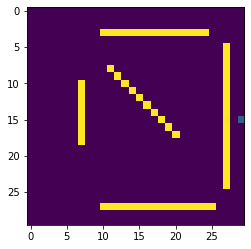

-------------------------------------
Original plan length: 42
Plan length with inverted actions: 42
-------------------------------------


In [20]:
inv_action_space = action_space[::-1]

P_inv = implement_policy_VI(G_star, action_space=inv_action_space)

plan_C_d = get_plan(X_init, X_goal, P_inv)

# Visualization of the algorithm
fig = plt.figure()
imgs = []
for X in plan_C_d:
    im = plot_enviroment(environment, X, X_goal)
    plot = plt.imshow(im)
    imgs.append([plot])

ani = animation.ArtistAnimation(fig, imgs, interval=100, blit=True)
ani.save('plan_C_d.gif')
plt.show()

# Compare plans length
print('-------------------------------------')
print(f'Original plan length: {len(plan)}')
print(f'Plan length with inverted actions: {len(plan_C_d)}')
print('-------------------------------------')

**Comment: Policy was changed and hence the plan was changed but in the end the plan length remains the same.**

**Conclusion: Value Iteration is an algorithm that could be used as an alternative to $A^*$ or Djikstra. The main advantage of VI is that we need to calculate for the particular target only once and then we can use cost-to-go matrix to reach the target point from any other state.**